In [5]:
from data_wiz import *
from mplfonts.bin.cli import init
from mplfonts import use_font

In [6]:
file_index_list = [
    {
        "path": "/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/情景1产能.xlsx",
        "focused_index": "Installed Power Capacity (MW)",
        "columns": ["Installed Power Capacity (MW)", "Installed Heat Capacity (MW)",
                    "Installed Hydrogen Production Capacity (MW)"]
    },
    {
        "path": "/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/情景1产量.xlsx",
        "focused_index": "Electricity Generation (GWh)",
        "columns": ["Electricity Generation (GWh)", "Planned Curtailment (GWh)", "Hydrogen Production (MWh)",
                    "Hydrogen Production (10000 Ton)", "Heat Generation (TJ)"]
    }
]

ref = RefData("/Users/zhixuan/PycharmProjects/3e-data-wiz/example-files/color_index.xlsx")
data = WorkingData(file_index_list, ref)
data.rule_out("省份")
data.calc_complex_index('Electricity Generation (GWh)', 'Installed Power Capacity (MW)')

,年份,Fuel_Group,省份,Installed Power Capacity (MW),Electricity Generation (GWh),Complex
0,2020.0,SMR,Hebei,0.000000,0.000000,NaN
1,2020.0,光热,Beijing,1.000000,1.930294,1.930294
2,2020.0,光热,Gansu,210.000000,416.785600,1.984693
3,2020.0,光热,Hainan,10.000000,74.460000,7.446000
4,2020.0,光热,Qinghai,210.000000,459.506125,2.188124
...,...,...,...,...,...,...
1140,2035.0,集中式光伏,West-InnerMongolia,7634.000000,13716.083000,1.796710
1141,2035.0,集中式光伏,Xinjiang,12340.000000,17846.604000,1.446240
1142,2035.0,集中式光伏,Xizang,1370.000000,1735.770000,1.266985
1143,2035.0,集中式光伏,Yunnan,47320.324480,68963.685543,1.457380


None


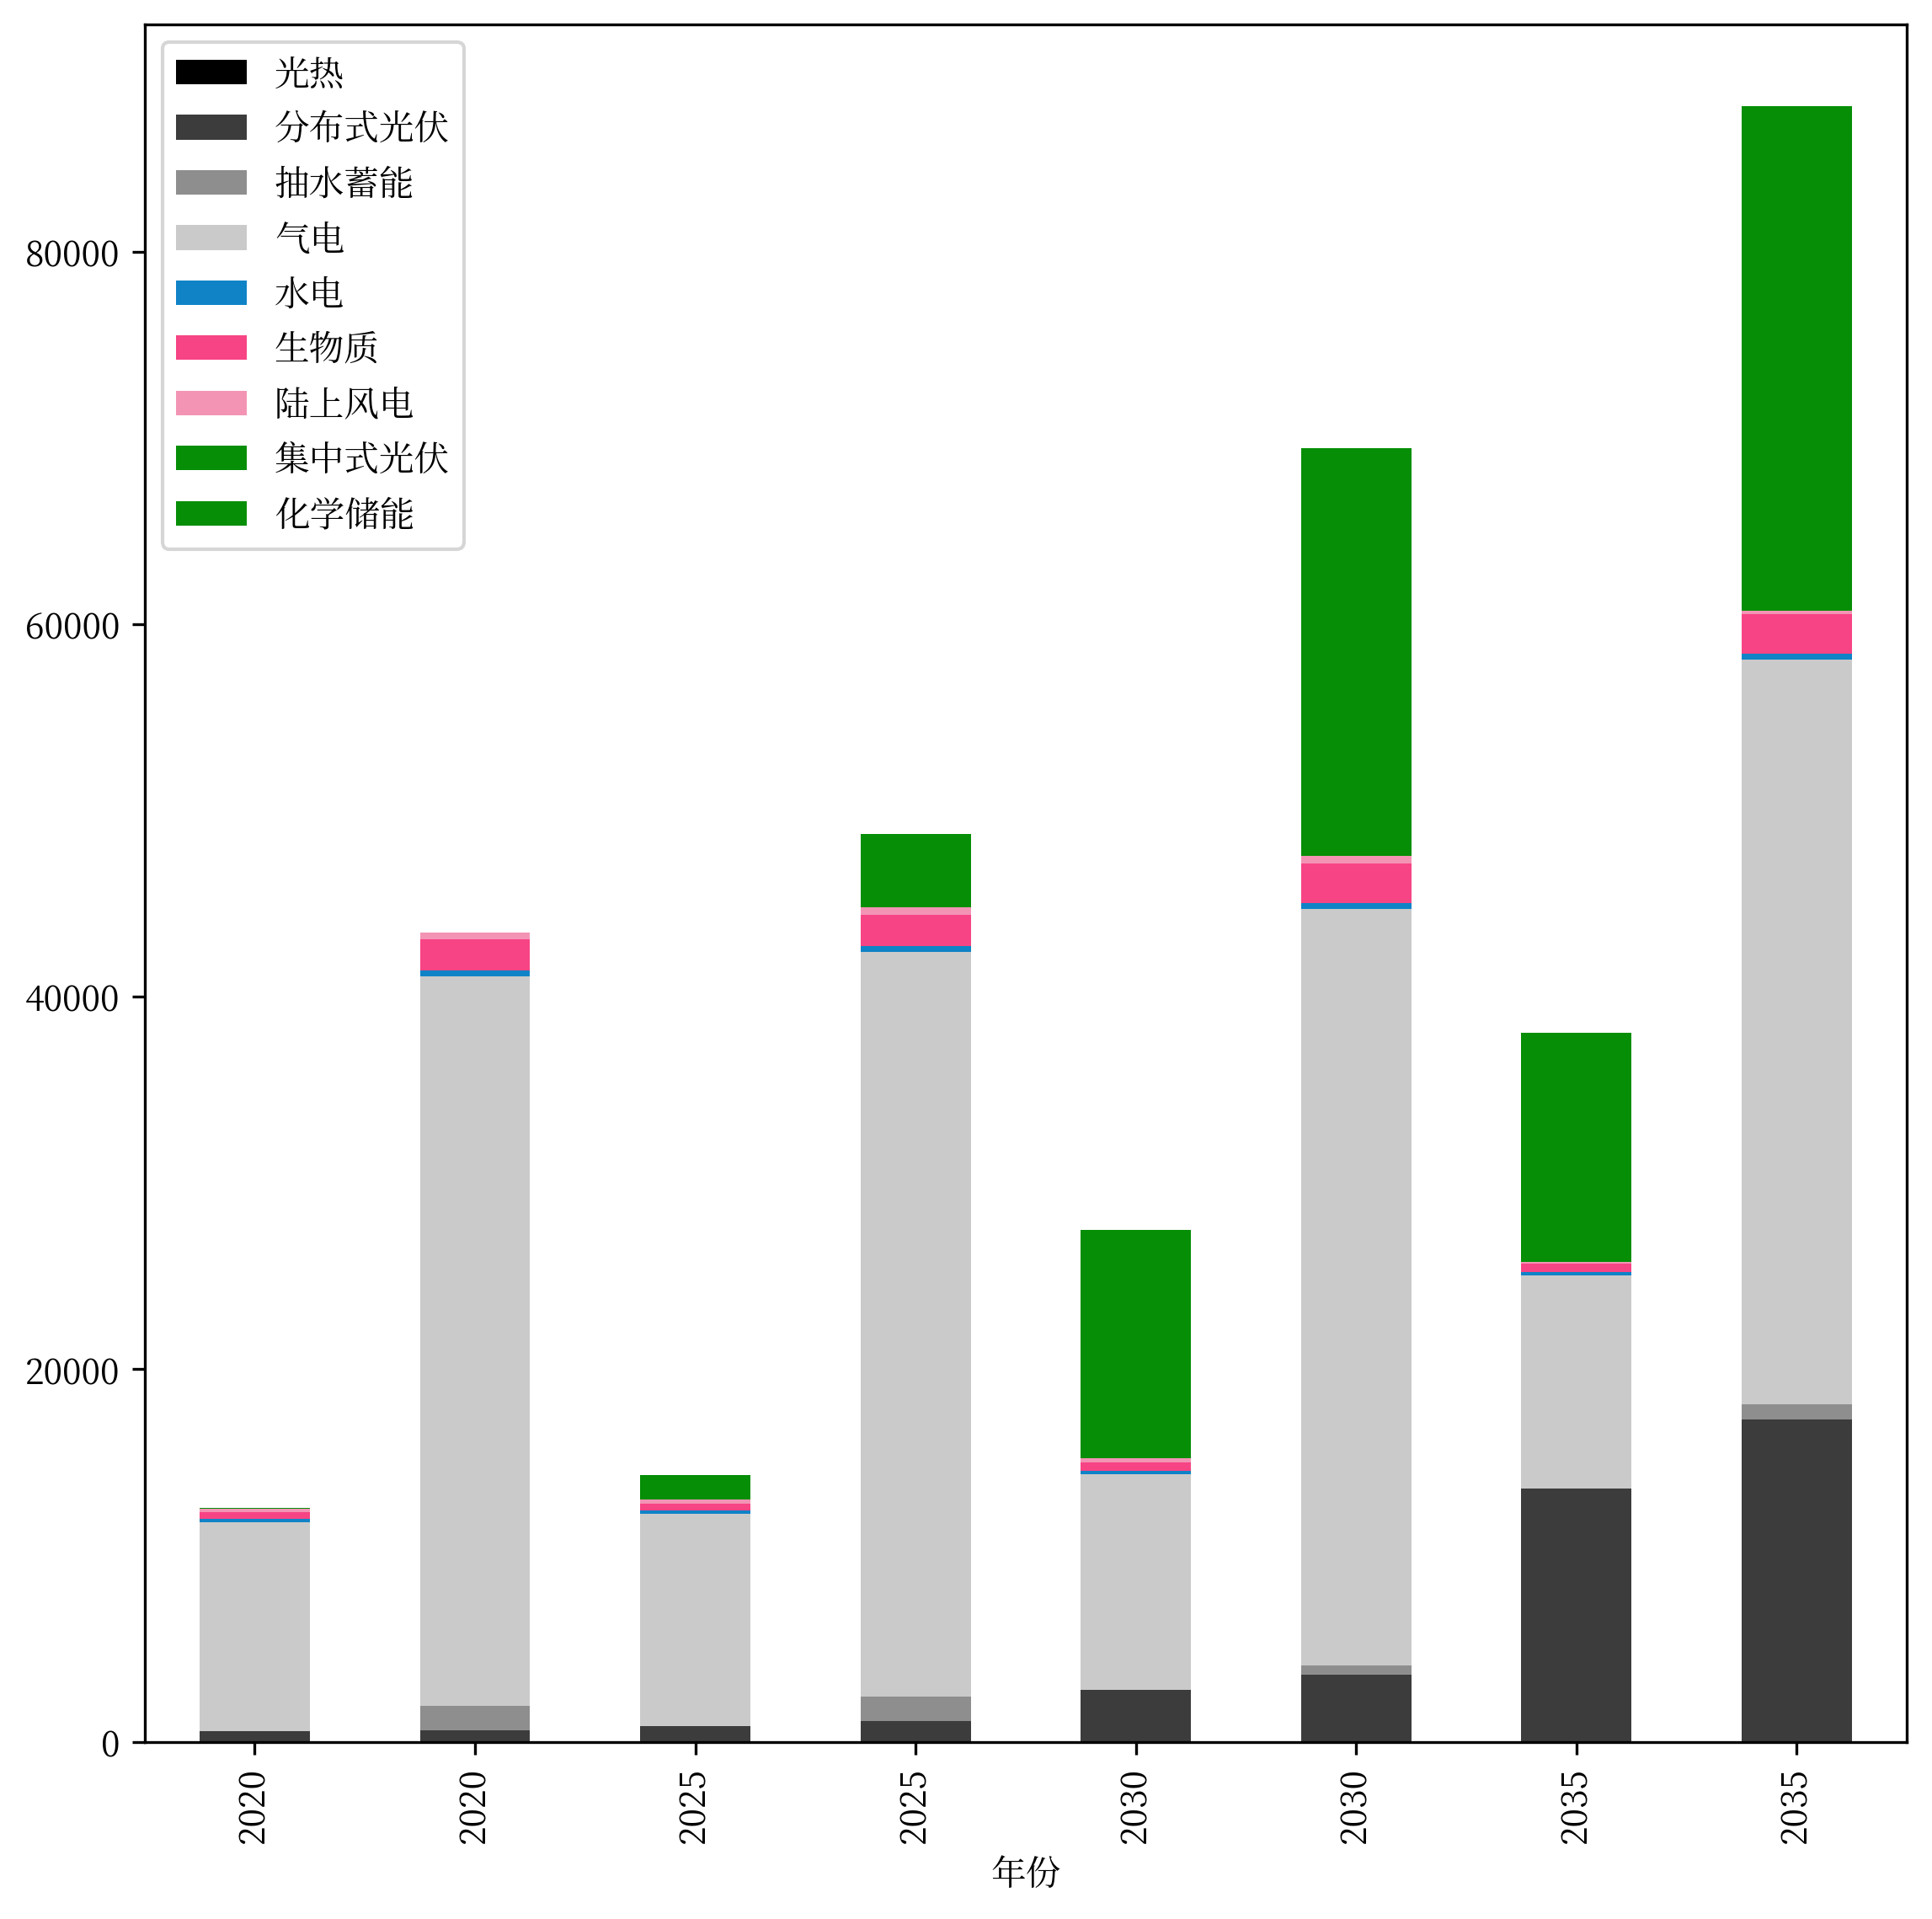

In [7]:
init()
use_font("Source Han Serif SC")
print(data.draw(focused_region="Beijing"))

In [8]:
data.working_df

,光热,分布式光伏,抽水蓄能,气电,水电,生物质,陆上风电,集中式光伏,化学储能,index
年份,,,,,,,,,,
2020,1.000000,570.000000,0.000000,11190.000000,180.000000,368.0,190.000000,50.000000,NaN,Installed Power Capacity (MW)
2020,1.930294,612.992365,1311.169438,39165.000000,320.946258,1656.0,370.000000,7.007635,NaN,Electricity Generation (GWh)
2020,1.930294,1.075425,inf,3.500000,1.783035,4.5,1.947368,0.140153,NaN,Complex
2025,1.000000,823.000000,0.000000,11425.294118,180.000000,370.0,190.000000,1341.607948,0.000000,Installed Power Capacity (MW)
2025,1.930294,1106.122680,1312.879584,39988.529412,324.000000,1665.0,390.250000,1807.726060,2153.561055,Electricity Generation (GWh)
2025,1.930294,1.344013,inf,3.500000,1.800000,4.5,2.053947,1.347432,inf,Complex
2030,1.000000,2760.000000,0.000000,11601.764706,180.000000,470.0,190.000000,12290.000000,0.000000,Installed Power Capacity (MW)
2030,1.930294,3600.649080,507.705587,40606.176471,324.000000,2115.0,390.250000,16693.747491,5186.444146,Electricity Generation (GWh)
2030,1.930294,1.304583,inf,3.500000,1.800000,4.5,2.053947,1.358320,inf,Complex
